<a href="https://colab.research.google.com/github/liviasantos08/desafio-fadesp-processo-seletivo/blob/master/Fadesp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
#clonar repositorio
!git clone https://github.com/jralbbuquerque/desafio-fadesp-processo-seletivo.git

Cloning into 'desafio-fadesp-processo-seletivo'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 15
Receiving objects: 100% (18/18), 4.38 MiB | 13.24 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [56]:
# Navegar até o diretório do repositório
%cd desafio-fadesp-processo-seletivo/

/content/desafio-fadesp-processo-seletivo/desafio-fadesp-processo-seletivo


In [57]:
# Listar os arquivos
!ls

data  metadata.xlsx  README.md


In [58]:
#importando biblioteca
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#leitura do metadata
df2 = pd.read_excel('/content/desafio-fadesp-processo-seletivo/metadata.xlsx')
df2

,Coluna,Descrição
0,Row ID,ID do registro
1,Order ID,Identificação do pedido
2,Order Date,Data do pedido
3,Ship Date,Data de envio do pedido
4,Ship Mode,Modo de envio do pedido
5,Customer ID,Identificação do cliente
6,Customer Name,Nome do cliente
7,Segment,Segemnto
8,City,Cidade para entrega
9,State,Estado para entrega


In [60]:
#Criando dataframe
df = pd.read_csv('/content/desafio-fadesp-processo-seletivo/data/dataset_desafio_fadesp.csv', sep=',', encoding='ISO-8859-1')

In [61]:
#visualizar primeiras linhas
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.30,2,0.00,106.14,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.37,3,0.10,36.04,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.12,4,0.00,29.64,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.87,3,0.50,-26.05,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.67,5,0.10,37.77,4.70,Medium


#Limpeza, Transformação e Visualização de Dados

In [62]:
#listar colunas
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [63]:
#informações da tabela(tipo,coluna e valores nulos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [64]:
#verificando se temos dados nulos por colunas
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [65]:
#localiza o valores nulos na coluna Postal Code
filtro = df["Postal Code"].isna()
df.loc[filtro,"Postal Code"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
51283   NaN
51284   NaN
51286   NaN
51287   NaN
51288   NaN
Name: Postal Code, Length: 41296, dtype: float64

In [66]:
# Preencher valores nulos com um valor constante 0
df["Postal Code"] = df["Postal Code"].fillna(0)
df["Postal Code"].tail()

51285   94533.00
51286       0.00
51287       0.00
51288       0.00
51289   80538.00
Name: Postal Code, dtype: float64

In [67]:
#verificando se temos dados nulos por colunas
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Postal Code       0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping Cost     0
Order Priority    0
dtype: int64

In [68]:
#verificando se temos dados duplicados
df.duplicated().sum()

0

In [69]:
#os 10 produtos mais vendidos
prod_vendidas = df.groupby('Product Name')['Quantity'].sum().reset_index()
prod_vendidas.sort_values(by='Quantity', ascending=False).head(10)

,Product Name,Quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


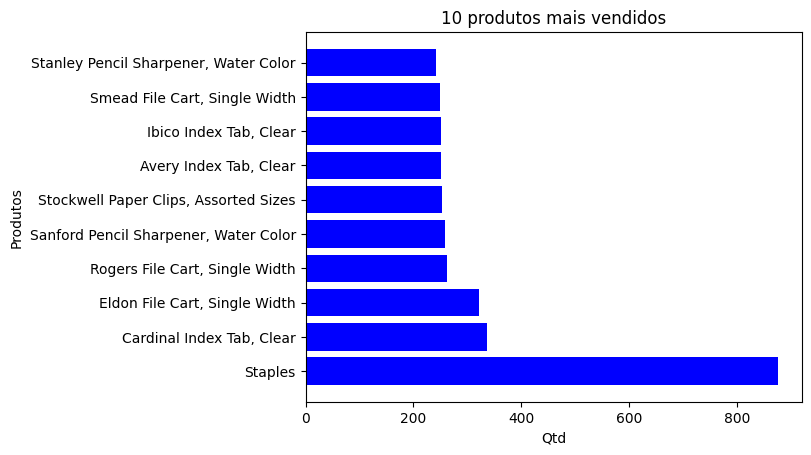

In [70]:
#Gráfico do top 10 de produtos mais vendidos
ordem = prod_vendidas.sort_values(by='Quantity', ascending=False).head(10)
plt.barh(ordem['Product Name'],ordem['Quantity'], color='blue')

plt.xlabel('Qtd')
plt.ylabel('Produtos')

plt.title('10 produtos mais vendidos')

plt.show()

In [71]:
#os 10 produtos mais lucrativos
prod_luc = df.groupby('Product Name')['Profit'].sum().reset_index()
prod_luc.sort_values(by='Profit', ascending=False).head(10)

,Product Name,Profit
866,Canon imageCLASS 2200 Advanced Copier,25199.93
970,"Cisco Smart Phone, Full Size",17238.52
2415,"Motorola Smart Phone, Full Size",17027.11
1926,"Hoover Stove, Red",11807.97
3098,"Sauder Classic Bookcase, Traditional",10672.07
1714,"Harbour Creations Executive Leather Armchair, ...",10427.33
2501,"Nokia Smart Phone, Full Size",9938.20
971,"Cisco Smart Phone, with Caller ID",9786.64
2502,"Nokia Smart Phone, with Caller ID",9465.33
589,"Belkin Router, USB",8955.02


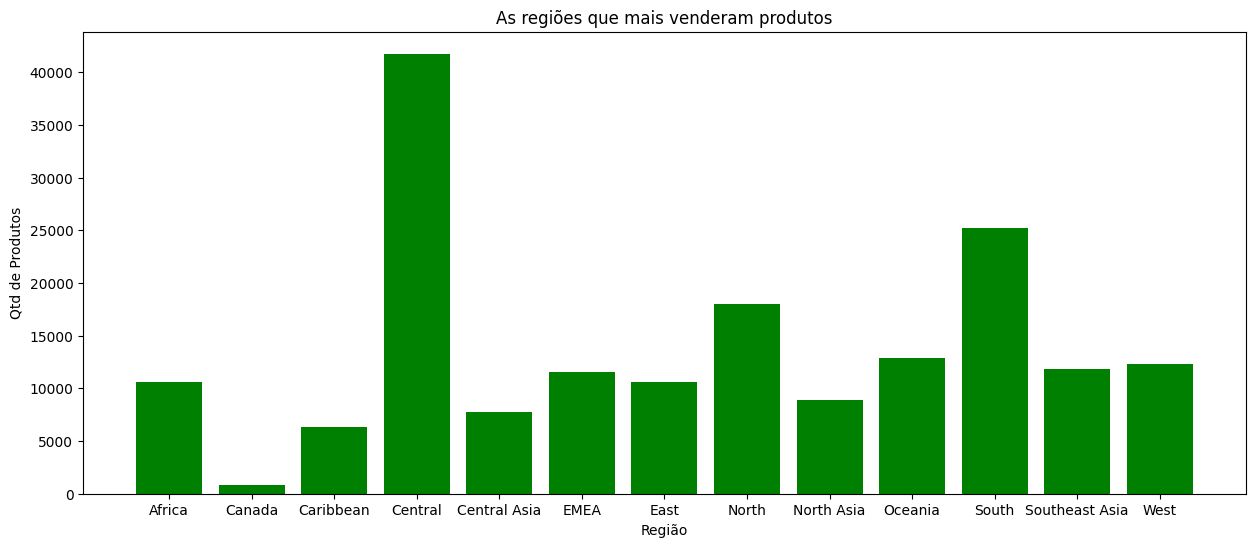

In [72]:
#Qtd de vendas por Região
venda_reg = df.groupby(('Region'))['Quantity'].sum().reset_index()
plt.figure(figsize=(15, 6))
plt.bar(venda_reg['Region'],venda_reg['Quantity'], color='green')

plt.xlabel('Região')
plt.ylabel('Qtd de Produtos')

plt.title('As regiões que mais venderam produtos')

plt.show()

In [73]:
#distribuição geografica do produto mais vendido por região
prod_reg =  df.groupby(['Product Name','Region'])['Quantity'].sum().reset_index()
prod_reg.loc[prod_reg['Product Name']=='Staples']

,Product Name,Region,Quantity
18354,Staples,Central,249
18355,Staples,East,267
18356,Staples,South,144
18357,Staples,West,216


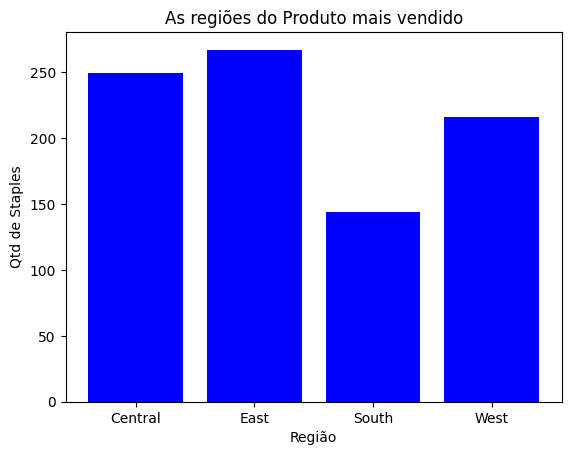

In [74]:
#Representação gráfica da distribuição geográfica do produto mais vendido
x = prod_reg.loc[prod_reg['Product Name']=='Staples']

plt.bar(x['Region'],x['Quantity'], color='blue')

plt.xlabel('Região')
plt.ylabel('Qtd de Staples')

plt.title('As regiões do Produto mais vendido')

plt.show()

In [75]:
#distribuição geografica do produto mais vendido por estado (limit 10)
prod_state =  df.groupby(['Product Name','State'])['Quantity'].sum().reset_index()
prod_state.loc[prod_state['Product Name']=='Staples'].sort_values(by='Quantity', ascending=False).head(10)

,Product Name,State,Quantity
41108,Staples,California,162
41130,Staples,New York,125
41140,Staples,Texas,109
41115,Staples,Illinois,66
41133,Staples,Ohio,47
41136,Staples,Pennsylvania,46
41113,Staples,Florida,37
41122,Staples,Michigan,26
41139,Staples,Tennessee,26
41114,Staples,Georgia,20


In [76]:
#distribuição geografica do produto mais vendido por cidade (limit 10)
prod_city =  df.groupby(['Product Name','City'])['Quantity'].sum().reset_index()
prod_city.loc[prod_city['Product Name']=='Staples'].sort_values(by='Quantity', ascending=False).head(10)

,Product Name,City,Quantity
43776,Staples,New York City,92
43758,Staples,Los Angeles,65
43746,Staples,Houston,61
43792,Staples,San Francisco,50
43782,Staples,Philadelphia,42
43718,Staples,Chicago,40
43722,Staples,Columbus,32
43777,Staples,Newark,19
43724,Staples,Dallas,15
43756,Staples,Long Beach,14


In [77]:
#verificar tipos de objetos
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [78]:
#Erro proposital para mostrar a conversão de formato do tipo data
#df['Order Date'] = pd.to_datetime(df['Order Date'])
#df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [79]:
#Visualizando datas do pedido fora do padrão
df['Order Date']

0          1/1/2011
1          1/1/2011
2          1/1/2011
3          1/1/2011
4          1/1/2011
            ...    
51285    31-12-2014
51286    31-12-2014
51287    31-12-2014
51288    31-12-2014
51289    31-12-2014
Name: Order Date, Length: 51290, dtype: object

In [80]:
#Formatando datas do pedido fora do padrão
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y', errors='coerce').combine_first(
    pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors='coerce')
)
df['Order Date']

0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
51285   2014-12-31
51286   2014-12-31
51287   2014-12-31
51288   2014-12-31
51289   2014-12-31
Name: Order Date, Length: 51290, dtype: datetime64[ns]

In [81]:
#Formatando datas de envio fora do padrão
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y', errors='coerce').combine_first(
    pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors='coerce')
)
df['Ship Date']

0       2011-01-06
1       2011-01-08
2       2011-01-05
3       2011-01-05
4       2011-01-08
           ...    
51285   2015-01-04
51286   2015-01-05
51287   2015-01-02
51288   2015-01-06
51289   2015-01-04
Name: Ship Date, Length: 51290, dtype: datetime64[ns]

In [82]:
#Criando coluna Tempo de entrega
df['Shipping time'] = df['Ship Date'] - df['Order Date']
df['Shipping time']

0       5 days
1       7 days
2       4 days
3       4 days
4       7 days
         ...  
51285   4 days
51286   5 days
51287   2 days
51288   6 days
51289   4 days
Name: Shipping time, Length: 51290, dtype: timedelta64[ns]

In [83]:
#Média do tempo de envio por Sub Categoria
df.groupby("Sub-Category")["Shipping time"].mean()

Sub-Category
Accessories   3 days 22:23:31.902439024
Appliances    3 days 21:17:32.307692307
Art           3 days 23:53:30.731107925
Binders       3 days 23:19:30.351105331
Bookcases     3 days 22:14:52.907507258
Chairs                  4 days 00:00:00
Copiers       3 days 23:52:13.603238866
Envelopes     3 days 23:19:11.704312115
Fasteners     3 days 23:53:27.272727272
Furnishings   4 days 00:24:59.053627760
Labels        3 days 23:21:52.356101304
Machines      4 days 00:15:30.282637954
Paper         3 days 21:01:43.787450537
Phones        3 days 23:06:22.841823056
Storage       3 days 23:11:02.502470844
Supplies      4 days 00:11:52.577319587
Tables        4 days 00:15:03.135888501
Name: Shipping time, dtype: timedelta64[ns]

In [84]:
#Relação Frete(Shipping Cost) x tempo de entrega(Shipping time)
df[['Shipping time','Shipping Cost']].groupby(['Shipping time']).agg(['mean','std','count'])

Shipping Cost             
                       mean   std  count
Shipping time                           
0 days                43.16 85.15   2600
1 days                44.47 93.29   1662
2 days                39.05 76.96   7026
3 days                35.69 73.32   5035
4 days                22.44 46.78  14434
5 days                18.79 37.80  11221
6 days                18.04 36.47   6255
7 days                21.28 45.21   3057

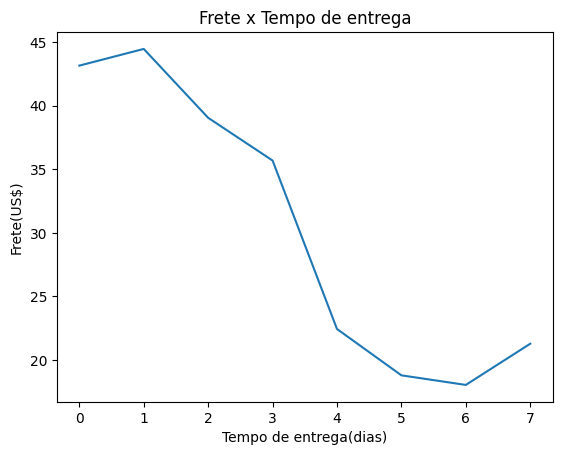

In [85]:
#Gráfico de linhas do Valor Frete(média) x tempo de entrega(dias)
df.groupby(df["Shipping time"].dt.days)["Shipping Cost"].mean().plot(title="Frete x Tempo de entrega")
plt.xlabel("Tempo de entrega(dias)")
plt.ylabel("Frete(US$)");

In [86]:
#Relação Vendas(Sales) x tempo de entrega(Shipping time)
df[['Shipping time','Sales']].groupby(['Shipping time']).agg(['mean','std','count'])

Sales              
                mean    std  count
Shipping time                     
0 days        249.08 472.51   2600
1 days        249.79 465.55   1662
2 days        255.89 524.79   7026
3 days        239.66 453.66   5035
4 days        248.86 477.59  14434
5 days        240.10 493.86  11221
6 days        241.61 449.70   6255
7 days        254.38 568.09   3057

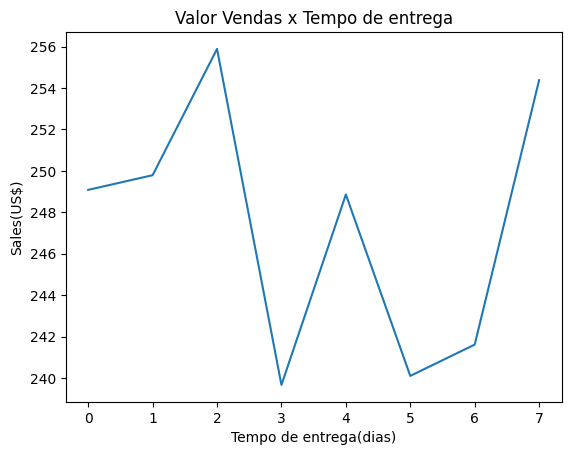

In [87]:
#Gráfico de linhas de Valor Vendas(média) x Tempo de entrega(dia)
df.groupby(df["Shipping time"].dt.days)["Sales"].mean().plot(title="Valor Vendas x Tempo de entrega")
plt.xlabel("Tempo de entrega(dias)")
plt.ylabel("Sales(US$)");

In [88]:
#Agrupamento por Ano e Categoria
df.groupby([df["Order Date"].dt.year, "Category"])["Profit"].sum()
#Formatando float para duas casa decimais
pd.options.display.float_format = '{:.2f}'.format

In [89]:
valor_vendas_categoria = df.groupby([df["Order Date"].dt.year, "Category"])["Sales"].sum().reset_index()
valor_vendas_categoria

,Order Date,Category,Sales
0,2011,Furniture,756192.38
1,2011,Office Supplies,675606.45
2,2011,Technology,827652.06
3,2012,Furniture,858902.56
4,2012,Office Supplies,795094.63
5,2012,Technology,1023441.51
6,2013,Furniture,1117723.55
7,2013,Office Supplies,1010717.64
8,2013,Technology,1277305.25
9,2014,Furniture,1378055.69


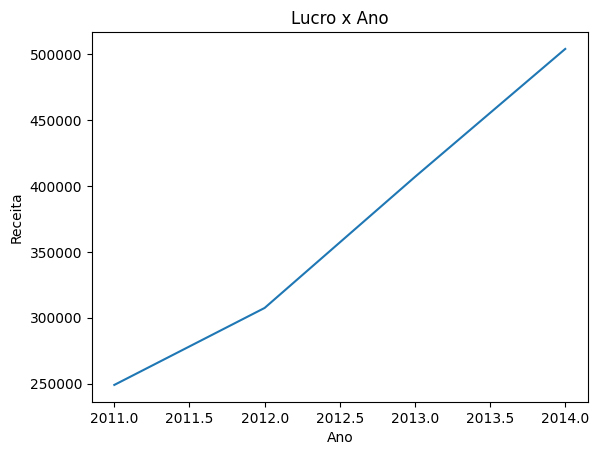

In [90]:
#Gráfico de linhas do Lucro por Ano
df.groupby(df["Order Date"].dt.year)["Profit"].sum().plot(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Lucro");

In [91]:
#Renomeando colunas para o database sqlite
df.columns = df.columns.str.replace(' ', '_')

In [92]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'Shipping_time'],
      dtype='object')

In [93]:
df.to_excel('output.xlsx', index=False)

#Database Sqlite

In [94]:
#Criando banco de dados sqlite
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo=False)
df.to_sql('store', engine, index=False, if_exists='replace')

<ipython-input-94-4c18a5b09ce4>:5: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  df.to_sql('store', engine, index=False, if_exists='replace')


51290

In [95]:
# Consultas SQL
query = "SELECT * FROM store"
result = pd.read_sql(query, engine)
print(result.head())

   Row_ID         Order_ID                  Order_Date  \
0   42433     AG-2011-2040  2011-01-01 00:00:00.000000   
1   22253    IN-2011-47883  2011-01-01 00:00:00.000000   
2   48883     HU-2011-1220  2011-01-01 00:00:00.000000   
3   11731  IT-2011-3647632  2011-01-01 00:00:00.000000   
4   22255    IN-2011-47883  2011-01-01 00:00:00.000000   

                    Ship_Date       Ship_Mode Customer_ID    Customer_Name  \
0  2011-01-06 00:00:00.000000  Standard Class    TB-11280  Toby Braunhardt   
1  2011-01-08 00:00:00.000000  Standard Class    JH-15985      Joseph Holt   
2  2011-01-05 00:00:00.000000    Second Class      AT-735    Annie Thurman   
3  2011-01-05 00:00:00.000000    Second Class    EM-14140     Eugene Moren   
4  2011-01-08 00:00:00.000000  Standard Class    JH-15985      Joseph Holt   

       Segment         City            State  ...         Category  \
0     Consumer  Constantine      Constantine  ...  Office Supplies   
1     Consumer  Wagga Wagga  New South Wal

In [96]:
#Listar colunas
query = "PRAGMA table_info('store') "
result = pd.read_sql(query, engine)
print(result)

    cid            name      type  notnull dflt_value  pk
0     0          Row_ID    BIGINT        0       None   0
1     1        Order_ID      TEXT        0       None   0
2     2      Order_Date  DATETIME        0       None   0
3     3       Ship_Date  DATETIME        0       None   0
4     4       Ship_Mode      TEXT        0       None   0
5     5     Customer_ID      TEXT        0       None   0
6     6   Customer_Name      TEXT        0       None   0
7     7         Segment      TEXT        0       None   0
8     8            City      TEXT        0       None   0
9     9           State      TEXT        0       None   0
10   10         Country      TEXT        0       None   0
11   11     Postal_Code     FLOAT        0       None   0
12   12          Market      TEXT        0       None   0
13   13          Region      TEXT        0       None   0
14   14      Product_ID      TEXT        0       None   0
15   15        Category      TEXT        0       None   0
16   16    Sub

In [97]:
#Query do Produtos vendidos na cidade de Budapest
query = "SELECT Row_ID, City, Product_Name, Sales, Quantity FROM store Where City='Budapest'"
result = pd.read_sql(query, engine)
print(result.head())

   Row_ID      City                          Product_Name  Sales  Quantity
0   48883  Budapest               Tenex Box, Single Width  66.12         4
1   49960  Budapest       Ibico Binding Machine, Recycled 103.56         2
2   44309  Budapest     BIC Pencil Sharpener, Water Color  32.19         1
3   48225  Budapest  Ikea Library with Doors, Traditional 363.39         1
4   48223  Budapest                      Canon Ink, Laser 588.60         4


In [98]:
#Excluindo a coluna Shipping_time
query = "ALTER TABLE store DROP COLUMN Shipping_time"

In [99]:
#Listando colunas
query = "PRAGMA table_info('store') "
result = pd.read_sql(query, engine)
print(result)

    cid            name      type  notnull dflt_value  pk
0     0          Row_ID    BIGINT        0       None   0
1     1        Order_ID      TEXT        0       None   0
2     2      Order_Date  DATETIME        0       None   0
3     3       Ship_Date  DATETIME        0       None   0
4     4       Ship_Mode      TEXT        0       None   0
5     5     Customer_ID      TEXT        0       None   0
6     6   Customer_Name      TEXT        0       None   0
7     7         Segment      TEXT        0       None   0
8     8            City      TEXT        0       None   0
9     9           State      TEXT        0       None   0
10   10         Country      TEXT        0       None   0
11   11     Postal_Code     FLOAT        0       None   0
12   12          Market      TEXT        0       None   0
13   13          Region      TEXT        0       None   0
14   14      Product_ID      TEXT        0       None   0
15   15        Category      TEXT        0       None   0
16   16    Sub

In [100]:
# valor frente para a cidade Wagga Wagga com mais de 3 unid.
query = "SELECT City, Product_Name, Quantity, Shipping_Cost FROM store Where City='Wagga Wagga' and Quantity>3"
result = pd.read_sql(query, engine)
print(result)

          City                                Product_Name  Quantity  \
0  Wagga Wagga                  Eldon Light Bulb, Duo Pack         5   
1  Wagga Wagga     Bevis Training Table, Adjustable Height         5   
2  Wagga Wagga                          Enermax Mouse, USB         4   
3  Wagga Wagga            Belkin Flash Drive, Programmable         6   
4  Wagga Wagga                Stockwell Push Pins, 12 Pack         4   
5  Wagga Wagga  Hon Executive Leather Armchair, Adjustable         5   
6  Wagga Wagga              Avery Binding Machine, Economy         5   
7  Wagga Wagga                   Cardinal Index Tab, Clear         4   
8  Wagga Wagga                Ikea Classic Bookcase, Metal         6   
9  Wagga Wagga              Breville Coffee Grinder, Black         6   

   Shipping_Cost  
0           4.70  
1         104.37  
2          17.60  
3          14.21  
4           2.89  
5         166.04  
6           5.98  
7           0.91  
8         166.02  
9          23.17 

In [101]:
#Produtos com desconto entre 20% e 50%
query = "SELECT Product_Name, Sales, Quantity, Discount, Profit FROM store Where Discount BETWEEN 0.2 and 0.5"
result = pd.read_sql(query, engine)
print(result)

                                          Product_Name  Sales  Quantity  \
0                          Enermax Note Cards, Premium  44.87         3   
1                  Hamilton Beach Refrigerator, Silver 400.70         2   
2                             Memorex Memory Card, USB  81.98         2   
3              Wilson Jones Hole Reinforcements, Clear   9.58         6   
4                        Hamilton Beach Toaster, Black 364.42         8   
...                                                ...    ...       ...   
12149                    Avery Binder Covers, Recycled  22.86         4   
12150                         Memorex Mouse, Bluetooth  61.97         4   
12151                               GBC Binding covers  20.72         2   
12152  Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl  13.90         2   
12153                              Bagged Rubber Bands   3.02         3   

       Discount  Profit  
0          0.50  -26.05  
1          0.40   20.02  
2          0.40  -19.

##Metricas de avaliação


In [102]:
#Agrupar apenas colunas
data = df[['Category','Quantity','Sales']]
data

,Category,Quantity,Sales
0,Office Supplies,2,408.30
1,Office Supplies,3,120.37
2,Office Supplies,4,66.12
3,Office Supplies,3,44.87
4,Furniture,5,113.67
...,...,...,...
51285,Office Supplies,2,13.90
51286,Office Supplies,1,3.99
51287,Office Supplies,3,26.40
51288,Office Supplies,1,7.12


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [109]:
#Pré processamento para converter dados da coluna Category do tipo object para uma matriz numerica

df2 = pd.DataFrame(data)

#Criado instancia OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# One-hot encode da coluna Category
encoded_features = encoder.fit_transform(df[['Category']])

# Adicionar novos nomes de colunas baseado na codificação categories
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Category']))
df_encoded = pd.concat([df2.drop('Category', axis=1), encoded_df], axis=1)

print(df_encoded.head())

   Quantity  Sales  Category_Furniture  Category_Office Supplies  \
0         2 408.30                0.00                      1.00   
1         3 120.37                0.00                      1.00   
2         4  66.12                0.00                      1.00   
3         3  44.87                0.00                      1.00   
4         5 113.67                1.00                      0.00   

   Category_Technology  
0                 0.00  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [110]:
# Separar as features (X) e o target (y)
X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
# Métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Métricas de avaliação: \nMSE: {mse};\nMAE: {mae};\nMAPE: {mape};")

# Exibir previsões e valores reais
result_df = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
print("\nPrevisões vs Valores Reais:")
print(result_df.head(10))

Métricas de avaliação: 
MSE: 211820.9670489391;
MAE: 215.6301592513161;
MAPE: 3.0126704996032005;

Previsões vs Valores Reais:
        Real  Predito
49728 641.40   563.12
45547  50.58    90.62
15664  61.71   -42.44
40561 396.58   582.88
49426  16.44   -42.44
18956 242.88   363.62
14238  24.72    24.12
31818  28.68   430.12
41388 161.51   383.31
37236 387.10   383.31


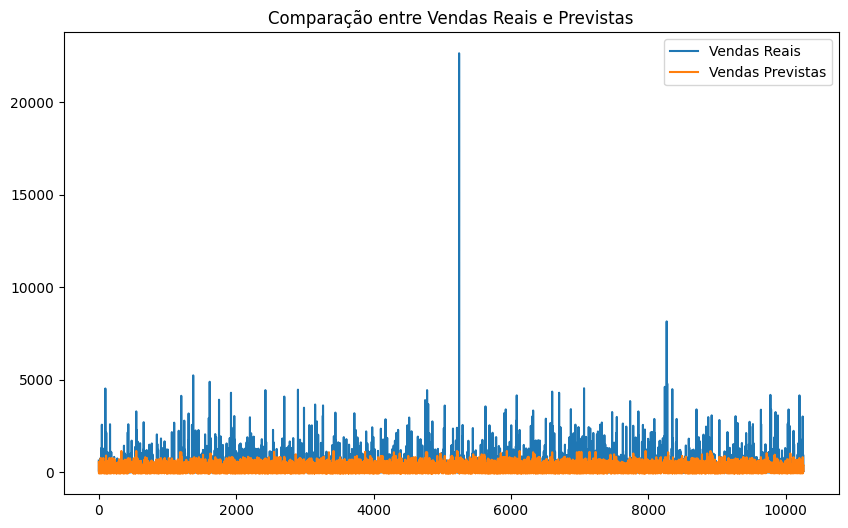

In [111]:
# Gráfico comparativo Vendas Reais x Vendas Previstas
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Vendas Reais')
plt.plot(y_pred, label='Vendas Previstas')
plt.legend()
plt.title('Comparação entre Vendas Reais e Previstas')
plt.show()

In [112]:
# Salvar o modelo
import pickle
with open('modelo.pkl', 'wb') as file:
    pickle.dump(model, file)